# Analisis Pengaruh Jenis Pekerjaan Ibu Terhadap Jumlah Kelahiran Bayi di Jakarta Tahun 2017-2019 Melalui Pendekatan Data Panel

## 1. Preprocessing Data


In [192]:
import pandas as pd
import numpy as np

# Membaca data CSV
file_path = 'C:/Users/thinkpad.DESKTOP-BP0710L/Downloads/Data_Jumlah_Kelahiran_Bayi.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memeriksa struktur data
print(df.head())

# Memeriksa apakah ada nilai yang hilang
print(df.isnull().sum())

# Menghapus baris dengan nilai yang hilang
df = df.dropna()

# Memeriksa duplikasi
df = df.drop_duplicates()

# Mengonversi kolom 'tahun' dan 'jumlah' ke tipe data yang benar
df['tahun'] = df['tahun'].astype(int)
df['jumlah'] = df['jumlah'].astype(int)

# Mengonversi kolom kategori menjadi tipe kategori untuk efisiensi
df['provinsi'] = df['provinsi'].astype('category')
df['nama_kota'] = df['nama_kota'].astype('category')
df['nama_kecamatan'] = df['nama_kecamatan'].astype('category')
df['nama_kelurahan'] = df['nama_kelurahan'].astype('category')
df['pekerjaan_ibu'] = df['pekerjaan_ibu'].astype('category')

# Memeriksa ulang data setelah pembersihan
print(df.info())


   tahun     provinsi           nama_kota   nama_kecamatan nama_kelurahan  \
0   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
1   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
2   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
3   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
4   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   

         pekerjaan_ibu  jumlah  periode_data  
0  Belum-Tidak Bekerja       1          2015  
1                Bidan       1          2015  
2                 Guru       1          2015  
3      Karyawan Swasta       1          2015  
4              Lainnya       1          2015  
tahun             0
provinsi          0
nama_kota         0
nama_kecamatan    0
nama_kelurahan    0
pekerjaan_ibu     0
jumlah            0
periode_data      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 17222 entries, 0 to 28550
Data column

## 2. Pembersihan Data (Data Cleaning)
Proses ini mencakup pemeriksaan dan pembersihan data dari nilai yang hilang (missing values) dan duplikat (duplicates).

In [193]:
# Memeriksa apakah ada nilai yang hilang
print(df.isnull().sum())

# Menghapus baris dengan nilai yang hilang
df = df.dropna()

# Memeriksa duplikasi
df = df.drop_duplicates()

# Mengonversi kolom 'tahun' dan 'jumlah' ke tipe data yang benar
df['tahun'] = df['tahun'].astype(int)
df['jumlah'] = df['jumlah'].astype(int)

# Mengonversi kolom kategori menjadi tipe kategori untuk efisiensi
df['provinsi'] = df['provinsi'].astype('category')
df['nama_kota'] = df['nama_kota'].astype('category')
df['nama_kecamatan'] = df['nama_kecamatan'].astype('category')
df['nama_kelurahan'] = df['nama_kelurahan'].astype('category')
df['pekerjaan_ibu'] = df['pekerjaan_ibu'].astype('category')

# Memeriksa ulang data setelah pembersihan
print(df.info())

tahun             0
provinsi          0
nama_kota         0
nama_kecamatan    0
nama_kelurahan    0
pekerjaan_ibu     0
jumlah            0
periode_data      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 17222 entries, 0 to 28550
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tahun           17222 non-null  int32   
 1   provinsi        17222 non-null  category
 2   nama_kota       17222 non-null  category
 3   nama_kecamatan  17222 non-null  category
 4   nama_kelurahan  17222 non-null  category
 5   pekerjaan_ibu   17222 non-null  category
 6   jumlah          17222 non-null  int32   
 7   periode_data    17222 non-null  int64   
dtypes: category(5), int32(2), int64(1)
memory usage: 534.4 KB
None


## 3. Membuat Kolom ID dan Set Index
Proses ini membuat kolom id yang merupakan gabungan dari nama_kelurahan dan tahun, dan menetapkan MultiIndex berdasarkan id dan tahun untuk analisis data panel.

In [194]:
# Membuat kolom 'id' dengan menggabungkan 'nama_kelurahan' dan 'tahun'
df['id'] = df['nama_kelurahan'].astype(str) + '-' + df['tahun'].astype(str)

# Menetapkan MultiIndex untuk entitas (id) dan periode waktu (tahun)
df.set_index(['id', 'tahun'], inplace=True)

# Memeriksa struktur index untuk memastikan data sudah memiliki MultiIndex
print(df.index)


MultiIndex([(               'P. PARI-2015', 2015),
            (               'P. PARI-2015', 2015),
            (               'P. PARI-2015', 2015),
            (               'P. PARI-2015', 2015),
            (               'P. PARI-2015', 2015),
            (               'P. PARI-2015', 2015),
            (               'P. PARI-2015', 2015),
            (               'P. PARI-2015', 2015),
            (             'P. TIDUNG-2015', 2015),
            (             'P. TIDUNG-2015', 2015),
            ...
            ('CIPINANG BESAR SELATAN-2019', 2019),
            ('CIPINANG BESAR SELATAN-2019', 2019),
            ('CIPINANG BESAR SELATAN-2019', 2019),
            (  'CIPINANG BESAR UTARA-2019', 2019),
            (  'CIPINANG BESAR UTARA-2019', 2019),
            (  'CIPINANG BESAR UTARA-2019', 2019),
            (  'CIPINANG BESAR UTARA-2019', 2019),
            (  'CIPINANG BESAR UTARA-2019', 2019),
            (  'CIPINANG BESAR UTARA-2019', 2019),
            (  

In [195]:
# Mengganti nama kolom 'periode_data' menjadi 'tahun'
df.rename(columns={'periode_data': 'tahun'}, inplace=True)

# Memeriksa nama kolom setelah perubahan
print(df.columns)


Index(['provinsi', 'nama_kota', 'nama_kecamatan', 'nama_kelurahan',
       'pekerjaan_ibu', 'jumlah', 'tahun'],
      dtype='object')


In [196]:
# Memeriksa beberapa baris pertama setelah penggantian nama kolom
print(df.head())

                       provinsi           nama_kota   nama_kecamatan  \
id           tahun                                                     
P. PARI-2015 2015   DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT   
             2015   DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT   
             2015   DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT   
             2015   DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT   
             2015   DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT   

                   nama_kelurahan        pekerjaan_ibu  jumlah  tahun  
id           tahun                                                     
P. PARI-2015 2015         P. PARI  Belum-Tidak Bekerja       1   2015  
             2015         P. PARI                Bidan       1   2015  
             2015         P. PARI                 Guru       1   2015  
             2015         P. PARI      Karyawan Swasta       1   2015  
             2015         P. PARI              Lainnya       1 

## 4. Filter Data untuk 3 Tahun Terakhir
Proses ini memilih data hanya untuk 3 tahun terakhir untuk fokus pada analisis yang lebih terkini.

In [197]:
# Menentukan tahun terakhir dalam dataset
last_year = df['tahun'].max()

# Memfilter data untuk hanya mengambil 3 tahun terakhir
df_last_3_years = df[df['tahun'] >= last_year - 2]

# Memeriksa data yang sudah difilter
print(df_last_3_years.head())


                                  provinsi      nama_kota nama_kecamatan  \
id                      tahun                                              
Rawa badak selatan-2017 2017   DKI Jakarta  Jakarta utara           Koja   
                        2017   DKI Jakarta  Jakarta utara           Koja   
                        2017   DKI Jakarta  Jakarta utara           Koja   
                        2017   DKI Jakarta  Jakarta utara           Koja   
                        2017   DKI Jakarta  Jakarta utara           Koja   

                                   nama_kelurahan               pekerjaan_ibu  \
id                      tahun                                                   
Rawa badak selatan-2017 2017   Rawa badak selatan        Pegawai Negeri Sipil   
                        2017   Rawa badak selatan           Pelajar-Mahasiswa   
                        2017   Rawa badak selatan                   Pensiunan   
                        2017   Rawa badak selatan             

## 5. Log Transformasi untuk Variabel Jumlah
Proses ini mentransformasi variabel jumlah menjadi jumlah_log dengan menggunakan logaritma (log(x + 1)) agar tidak ada masalah dengan nilai 0.

In [213]:
# Log-transformasi variabel jumlah (log(x+1) agar tidak ada masalah dengan nilai 0)
df_last_3_years.loc[:, 'jumlah_log'] = np.log1p(df_last_3_years['jumlah'])

# Memeriksa hasil transformasi
print(df_last_3_years[['jumlah', 'jumlah_log']].head())

                               jumlah  jumlah_log
id                      tahun                    
Rawa badak selatan-2017 2017        7    2.079442
                        2017       13    2.639057
                        2017        2    1.098612
                        2017        4    1.609438
                        2017        1    0.693147


## 6. Membuat Variabel Dummy untuk Pekerjaan Ibu
Proses ini mengonversi kategori pekerjaan_ibu menjadi variabel numerik (dummy).

In [214]:
# Mengonversi variabel pekerjaan_ibu menjadi kategori numerik (dummy) menggunakan .loc[] untuk menghindari SettingWithCopyWarning
df_last_3_years.loc[:, 'pekerjaan_ibu_dummies'] = pd.Categorical(df_last_3_years['pekerjaan_ibu']).codes

# Memeriksa hasil konversi
print(df_last_3_years[['pekerjaan_ibu', 'pekerjaan_ibu_dummies']].head())


                                            pekerjaan_ibu  \
id                      tahun                               
Rawa badak selatan-2017 2017         Pegawai Negeri Sipil   
                        2017            Pelajar-Mahasiswa   
                        2017                    Pensiunan   
                        2017                      Perawat   
                        2017   Tentara Nasional Indonesia   

                               pekerjaan_ibu_dummies  
id                      tahun                         
Rawa badak selatan-2017 2017                      31  
                        2017                      32  
                        2017                      41  
                        2017                      46  
                        2017                      54  


# Pemodelan

## 1. Model Regresi Panel (Fixed Effects)
Proses ini melibatkan penerapan model Fixed Effects menggunakan PanelOLS untuk menganalisis hubungan antara pekerjaan ibu dan jumlah kelahiran bayi, dengan kontrol terhadap efek entitas (kelurahan) menggunakan EntityEffects.

In [204]:
# Menetapkan variabel dependen dan independen
y = df_last_3_years['jumlah_log']
X = df_last_3_years[['pekerjaan_ibu_dummies']]

# Model Fixed Effects (FE)
fe_model = PanelOLS(y, X, entity_effects=True).fit()

# Menampilkan hasil model Fixed Effects
print(fe_model.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:             jumlah_log   R-squared:                        0.0106
Estimator:                   PanelOLS   R-squared (Between):              0.1994
No. Observations:               10612   R-squared (Within):               0.0106
Date:                Sun, Dec 01 2024   R-squared (Overall):              0.1339
Time:                        00:18:20   Log-likelihood                -1.943e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      105.10
Entities:                         801   P-value                           0.0000
Avg Obs:                       13.248   Distribution:                  F(1,9810)
Min Obs:                       2.0000                                           
Max Obs:                       24.000   F-statistic (robust):             105.10
                            

## 2. Model Random Effects 
Proses ini melakukan estimasi model Random Effects 

In [203]:
from linearmodels.panel import RandomEffects

# Model Random Effects (RE)
re_model = RandomEffects.from_formula('jumlah_log ~ pekerjaan_ibu_dummies', data=df_last_3_years).fit()

# Menampilkan hasil model Random Effects
print(re_model.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:             jumlah_log   R-squared:                        0.4750
Estimator:              RandomEffects   R-squared (Between):              0.8849
No. Observations:               10612   R-squared (Within):              -0.3166
Date:                Sun, Dec 01 2024   R-squared (Overall):              0.4750
Time:                        00:14:32   Log-likelihood                -2.178e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9601.9
Entities:                         801   P-value                           0.0000
Avg Obs:                       13.248   Distribution:                 F(1,10611)
Min Obs:                       2.0000                                           
Max Obs:                       24.000   F-statistic (robust):             9601.9
                            

## 3. Code untuk Pooled OLS (Common Effect Model)

In [176]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Misalkan df_last_3_years adalah dataset yang sudah diproses sebelumnya
# Definisikan variabel dependen dan independen
y = df_last_3_years['jumlah_log']  # Variabel dependen
X = df_last_3_years[['pekerjaan_ibu_dummies']]  # Variabel independen

# Menambahkan intercept (konstanta) ke model
X = sm.add_constant(X)

# Menjalankan model Common Effect (Pooled OLS)
pooled_model = sm.OLS(y, X).fit()

# Menampilkan hasil model
print(pooled_model.summary())


                            OLS Regression Results                            
Dep. Variable:             jumlah_log   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     96.70
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.01e-22
Time:                        23:47:37   Log-Likelihood:                -19617.
No. Observations:               10612   AIC:                         3.924e+04
Df Residuals:                   10610   BIC:                         3.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.88

# Pengujian

## 1. Uji Chow

In [179]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
import scipy.stats as stats

# 1. Membaca data CSV
file_path = 'C:/Users/thinkpad.DESKTOP-BP0710L/Downloads/Data_Jumlah_Kelahiran_Bayi.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memeriksa struktur data
print(df.head())

# 2. Memeriksa apakah ada nilai yang hilang
print(df.isnull().sum())

# Menghapus baris dengan nilai yang hilang
df = df.dropna()

# Memeriksa duplikasi
df = df.drop_duplicates()

# Mengonversi kolom 'tahun' dan 'jumlah' ke tipe data yang benar
df['tahun'] = df['tahun'].astype(int)
df['jumlah'] = df['jumlah'].astype(int)

# Mengonversi kolom kategori menjadi tipe kategori untuk efisiensi
df['provinsi'] = df['provinsi'].astype('category')
df['nama_kota'] = df['nama_kota'].astype('category')
df['nama_kecamatan'] = df['nama_kecamatan'].astype('category')
df['nama_kelurahan'] = df['nama_kelurahan'].astype('category')
df['pekerjaan_ibu'] = df['pekerjaan_ibu'].astype('category')

# 3. Filter data untuk 3 tahun terakhir (2017-2019)
df = df[df['tahun'].between(2017, 2019)]

# Membuat kolom 'id' dan 'jumlah_log'
df['id'] = df['nama_kelurahan'].astype(str) + '-' + df['tahun'].astype(str)
df['jumlah_log'] = np.log1p(df['jumlah'])  # Log(x + 1) agar tidak ada masalah dengan nilai 0
df['pekerjaan_ibu_dummies'] = pd.Categorical(df['pekerjaan_ibu']).codes

# Menetapkan MultiIndex berdasarkan 'id' dan 'tahun' untuk analisis panel
df.set_index(['id', 'tahun'], inplace=True)

# 4. Model Common Effect (Pooled OLS)
# Menyiapkan variabel dependen dan independen
y = df['jumlah_log']
X = sm.add_constant(df['pekerjaan_ibu_dummies'])  # Menambahkan konstanta

# Membuat model Pooled OLS
pooled_model = sm.OLS(y, X).fit()

# 5. Model Fixed Effects dengan menggunakan PanelOLS dari linearmodels
fe_model = PanelOLS.from_formula('jumlah_log ~ pekerjaan_ibu_dummies + EntityEffects', data=df).fit()

# 6. Uji Chow
# Menghitung R-squared dari kedua model
R_squared_ols = pooled_model.rsquared
R_squared_fe = fe_model.rsquared

# Menghitung jumlah observasi dan variabel independen
N = len(df.index.get_level_values('id').unique())  # Jumlah entitas (kelurahan)
T = len(df.index.get_level_values('tahun').unique())  # Jumlah periode waktu (tahun)
k = X.shape[1]  # Jumlah variabel independen (termasuk konstanta)

# Menghitung F-statistik untuk Uji Chow
f_stat = ((R_squared_fe - R_squared_ols) / (N - 1)) / ((1 - R_squared_fe) / (N * T - N - k))
print(f"F-statistic untuk Uji Chow: {f_stat}")

# Nilai kritis F untuk alpha = 0.05
from scipy.stats import f as f_dist
f_critical = f_dist.ppf(1 - 0.05, N - 1, N * T - N - k)
print(f"Nilai kritis F (alpha = 0.05): {f_critical}")

# Interpretasi Uji Chow
if f_stat > f_critical:
    print("H0 ditolak: Gunakan model Fixed Effects (FE).")
else:
    print("H0 diterima: Gunakan model Pooled OLS (Common Effect).")

# Menampilkan hasil model
print("\nHasil Model Pooled OLS:")
print(pooled_model.summary())
print("\nHasil Model Fixed Effects:")
print(fe_model.summary)


   tahun     provinsi           nama_kota   nama_kecamatan nama_kelurahan  \
0   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
1   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
2   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
3   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   
4   2015  DKI Jakarta  Kab.Adm.Kep.Seribu  KEP. SERIBU SLT        P. PARI   

         pekerjaan_ibu  jumlah  periode_data  
0  Belum-Tidak Bekerja       1          2015  
1                Bidan       1          2015  
2                 Guru       1          2015  
3      Karyawan Swasta       1          2015  
4              Lainnya       1          2015  
tahun             0
provinsi          0
nama_kota         0
nama_kecamatan    0
nama_kelurahan    0
pekerjaan_ibu     0
jumlah            0
periode_data      0
dtype: int64
F-statistic untuk Uji Chow: 0.0031700575762288103
Nilai kritis F (alpha = 0.05): 1

In [180]:
# 6. Uji Chow
# Menghitung R-squared dari kedua model
R_squared_ols = pooled_model.rsquared
R_squared_fe = fe_model.rsquared

# Menghitung jumlah observasi dan variabel independen
N = len(df.index.get_level_values('id').unique())  # Jumlah entitas (kelurahan)
T = len(df.index.get_level_values('tahun').unique())  # Jumlah periode waktu (tahun)
k = X.shape[1]  # Jumlah variabel independen (termasuk konstanta)

# Menghitung F-statistik untuk Uji Chow
f_stat = ((R_squared_fe - R_squared_ols) / (N - 1)) / ((1 - R_squared_fe) / (N * T - N - k))
print(f"F-statistic untuk Uji Chow: {f_stat}")

# Nilai kritis F untuk alpha = 0.05
from scipy.stats import f as f_dist
f_critical = f_dist.ppf(1 - 0.05, N - 1, N * T - N - k)
print(f"Nilai kritis F (alpha = 0.05): {f_critical}")

# Interpretasi Uji Chow
if f_stat > f_critical:
    print("H0 ditolak: Gunakan model Fixed Effects (FE).")
else:
    print("H0 diterima: Gunakan model Pooled OLS (Common Effect).")

F-statistic untuk Uji Chow: 0.0031700575762288103
Nilai kritis F (alpha = 0.05): 1.1049434076235995
H0 diterima: Gunakan model Pooled OLS (Common Effect).


## 2. Uji Breusch-Pagan Lagrange Multiplier (BP-LM)

In [184]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2

# 1. Membaca data dan filter hanya untuk 3 tahun terakhir (2017-2019)
file_path = 'C:/Users/thinkpad.DESKTOP-BP0710L/Downloads/Data_Jumlah_Kelahiran_Bayi.csv'
df_last_3_years = pd.read_csv(file_path)

# Mengonversi kolom 'tahun' dan 'jumlah' ke tipe data yang benar
df_last_3_years['tahun'] = df_last_3_years['tahun'].astype(int)
df_last_3_years['jumlah'] = df_last_3_years['jumlah'].astype(int)

# Memfilter data untuk tahun 2017-2019
df_last_3_years = df_last_3_years[df_last_3_years['tahun'].between(2017, 2019)]

# 2. Membuat kolom 'id' dengan menggabungkan 'nama_kelurahan' dan 'tahun'
df_last_3_years['id'] = df_last_3_years['nama_kelurahan'].astype(str) + '-' + df_last_3_years['tahun'].astype(str)

# Menetapkan MultiIndex untuk entitas dan periode waktu (id dan tahun)
df_last_3_years.set_index(['id', 'tahun'], inplace=True)

# 3. Membuat variabel dummy untuk pekerjaan ibu
df_last_3_years = pd.get_dummies(df_last_3_years, columns=['pekerjaan_ibu'], drop_first=True)

# 4. Membuat kolom 'jumlah_log' sebagai logaritma dari jumlah kelahiran bayi
df_last_3_years['jumlah_log'] = np.log1p(df_last_3_years['jumlah'])

# **Pemeriksaan tipe data**
print(df_last_3_years.dtypes)  # Cek tipe data setiap kolom

# **Periksa apakah kolom pekerjaan_ibu sudah menjadi numerik**
# Jika ada kolom pekerjaan_ibu yang tetap bertipe 'object', lakukan konversi

# 5. Membuat variabel dependen dan independen untuk model Pooled OLS
y = df_last_3_years['jumlah_log']  # Variabel dependen

# Pastikan hanya memilih kolom numerik untuk X (variabel independen)
X = df_last_3_years[[col for col in df_last_3_years.columns if col.startswith('pekerjaan_ibu_')]]  # Variabel independen (dummy)

# Menambahkan konstanta
X = sm.add_constant(X)

# **Pastikan semua kolom X adalah numerik**
X = X.astype('float64')

# Estimasi model Pooled OLS
pooled_model = sm.OLS(y, X).fit()

# 6. Hitung residual dari model Pooled OLS
residuals = pooled_model.resid

# 7. Hitung statistik LM untuk uji Breusch-Pagan
# Hitung varians residual per entitas
N = len(df_last_3_years.index.get_level_values('id').unique())  # Jumlah entitas (kelurahan)
T = len(df_last_3_years.index.get_level_values('tahun').unique())  # Jumlah periode waktu (tahun)

# Residual kuadrat per entitas
residual_squared = residuals ** 2

# Hitung statistik LM
LM_stat = (N * T / 2) * (np.sum(residual_squared) / (np.sum(residual_squared) - np.var(residual_squared)))
print(f"Statistik LM: {LM_stat}")

# 8. Menghitung nilai kritis LM untuk uji hipotesis
df_re = N - 1  # Derajat kebebasan untuk uji Breusch-Pagan
p_value = 1 - chi2.cdf(LM_stat, df_re)

# Menampilkan hasil uji
print(f"P-value untuk uji BP-LM: {p_value}")

# 9. Interpretasi hasil uji
if p_value < 0.05:
    print("H0 ditolak: Gunakan model Random Effects.")
else:
    print("H0 diterima: Gunakan model Pooled OLS (Common Effect).")


provinsi                       object
nama_kota                      object
nama_kecamatan                 object
nama_kelurahan                 object
jumlah                          int32
                               ...   
pekerjaan_ibu_Transportasi       bool
pekerjaan_ibu_Tukang Jahit       bool
pekerjaan_ibu_Wartawan           bool
pekerjaan_ibu_Wiraswasta         bool
jumlah_log                    float64
Length: 62, dtype: object
Statistik LM: 1201.5970364214656
P-value untuk uji BP-LM: 0.0
H0 ditolak: Gunakan model Random Effects.


### Sehingga RE akan digunakan

## Pengujian tambahan
## 3. Uji Hausman untuk Pemilihan Model

Proses ini melakukan uji Hausman untuk memilih antara model Fixed Effects atau Random Effects.


In [189]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
import numpy as np
from scipy.stats import chi2

# Mengasumsikan df_last_3_years adalah dataframe yang sudah dipersiapkan dan di-index oleh 'id' dan 'tahun'

# 1. Menetapkan variabel dependen dan independen
y = df_last_3_years['jumlah_log']  # Variabel dependen
X = df_last_3_years[[col for col in df_last_3_years.columns if col.startswith('pekerjaan_ibu_')]]  # Variabel independen
X = sm.add_constant(X)  # Menambahkan konstanta ke model

# 2. Model Fixed Effects (PanelOLS)
model_fe = PanelOLS(y, X, entity_effects=True)
fe_results = model_fe.fit()

# 3. Model Random Effects (RandomEffects)
model_re = RandomEffects(y, X)
re_results = model_re.fit()

# 4. Menghitung perbedaan koefisien antara model FE dan RE
fe_coefficients = fe_results.params
re_coefficients = re_results.params

# 5. Menghitung matriks kovarians untuk model FE dan RE
fe_cov = fe_results.cov
re_cov = re_results.cov

# 6. Menghitung statistik uji Hausman
diff_coeffs = fe_coefficients - re_coefficients
diff_cov = fe_cov + re_cov  # Penjumlahan kovarians FE dan RE

# Statistik uji Hausman = (differen coefficients)^T * (diff_cov)^(-1) * (difference coefficients)
hausman_stat = np.dot(np.dot(diff_coeffs.T, np.linalg.inv(diff_cov)), diff_coeffs)

# Derajat kebebasan untuk uji Hausman adalah jumlah koefisien yang diuji
df_re = len(fe_coefficients)  # Jumlah koefisien yang diuji

# Menghitung p-value dari statistik uji Hausman
p_value = 1 - chi2.cdf(hausman_stat, df_re)

# Menampilkan hasil uji Hausman
print(f"Statistik Uji Hausman: {hausman_stat}")
print(f"P-value untuk uji Hausman: {p_value}")

# Interpretasi
if p_value < 0.05:
    print("H0 ditolak: Gunakan model Fixed Effects.")
else:
    print("H0 diterima: Gunakan model Random Effects.")


Statistik Uji Hausman: 74.24036827095115
P-value untuk uji Hausman: 0.05186840808111581
H0 diterima: Gunakan model Random Effects.


# Uji Diagnostik

## 1. Multikolinearitas

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Menambahkan konstanta untuk VIF
X_with_const = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
print(vif)


                Variable       VIF
0                  const  2.991579
1  pekerjaan_ibu_dummies  1.000000


## 2. Autokorelasi

In [207]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(pooled_model.resid)
print(f'Durbin-Watson: {dw_stat}')


Durbin-Watson: 2.0930760147764764


## 3.  Heteroskedastisitas

In [208]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

# Memasukkan konstanta ke dalam X
X_with_const = add_constant(X)
bp_test = het_breuschpagan(pooled_model.resid, X_with_const)
print(f'Uji Breusch-Pagan: {bp_test}')


Uji Breusch-Pagan: (0.6688312325898234, 0.4134593895032127, 0.6687473291439617, 0.41350704998328613)


#  Validasi Model

## Prediksi dan Visualisasi

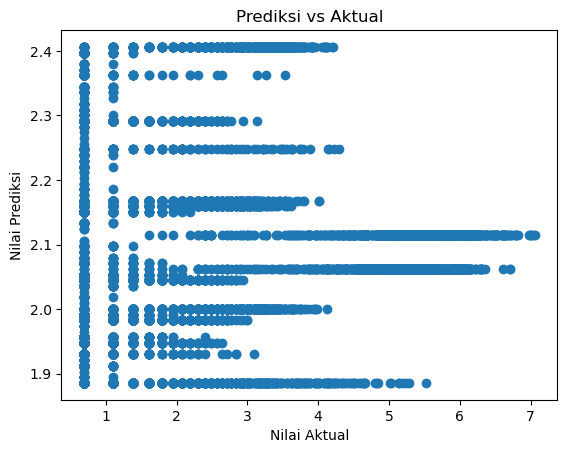

In [209]:
import matplotlib.pyplot as plt
y_pred = pooled_model.predict(X_with_const)
plt.scatter(y, y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Aktual")
plt.show()


## Evaluasi Kualitas Model

In [210]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}')


MSE: 2.3614211130667635, RMSE: 1.5366916128705732, MAE: 1.2003360753084342


================================ TERIMA KASIH ==============================